#Fashion MNIST Data Classification project


Step 1.) import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Step 2.) Load data


In [ ]:
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Step 3.) Print the shape of the data

In [ ]:
X_train.shape,y_train.shape, "*******************", X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '*******************', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = [   "T-shirt/top",	"Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boot"]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Step 3.) Show image

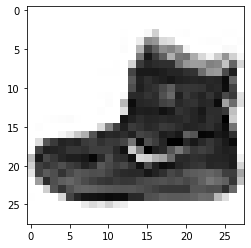

In [ ]:

plt.imshow(X_train[0],cmap='Greys')

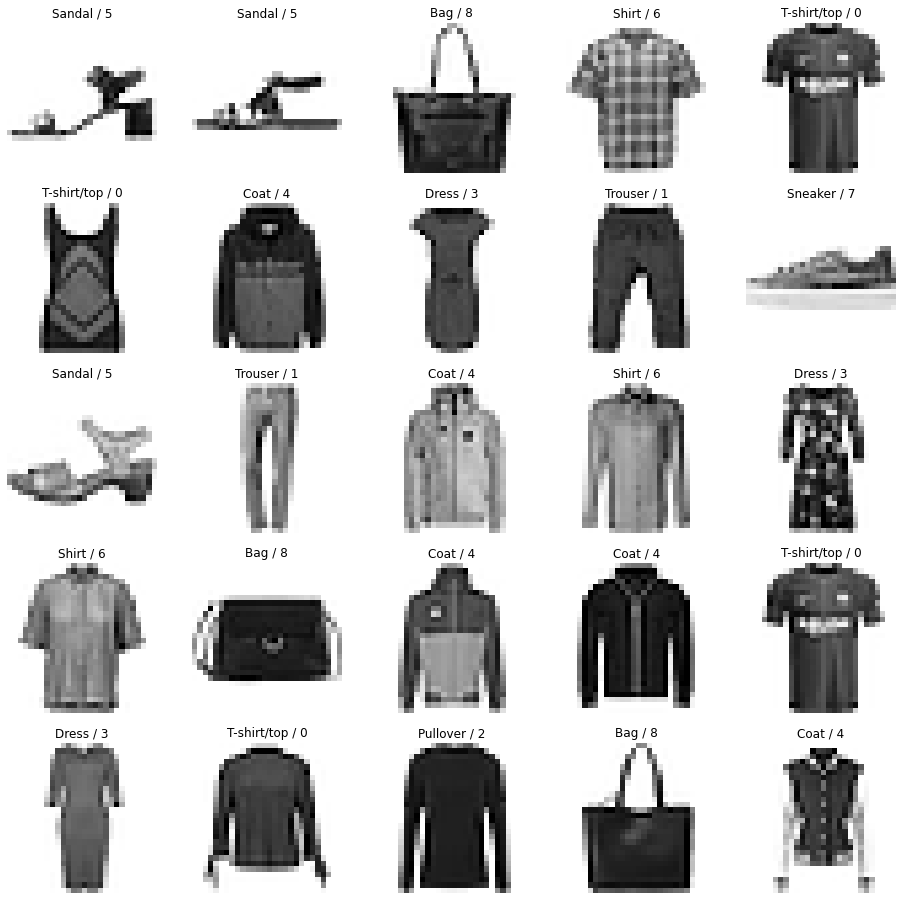

In [ ]:
plt.figure(figsize = (16,16))

j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test = np.expand_dims(X_test,-1)

In [ ]:
#Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
#Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size =0.2,random_state=2020)

In [ ]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

Step 3.) Building the CNN Model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 15s 154ms/step - loss: 0.6335 - accuracy: 0.7836 - val_loss: 0.4230 - val_accuracy: 0.8538
Epoch 2/10
94/94 [==============================] - 16s 166ms/step - loss: 0.3822 - accuracy: 0.8665 - val_loss: 0.3638 - val_accuracy: 0.8727
Epoch 3/10
94/94 [==============================] - 16s 175ms/step - loss: 0.3342 - accuracy: 0.8833 - val_loss: 0.3407 - val_accuracy: 0.8795
Epoch 4/10
94/94 [==============================] - 14s 154ms/step - loss: 0.3029 - accuracy: 0.8931 - val_loss: 0.3138 - val_accuracy: 0.8898
Epoch 5/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2833 - accuracy: 0.8989 - val_loss: 0.3072 - val_accuracy: 0.8926
Epoch 6/10
94/94 [==============================] - 15s 156ms/step - loss: 0.2642 - accuracy: 0.9075 - val_loss: 0.2948 - val_accuracy: 0.8951
Epoch 7/10
94/94 [==============================] - 15s 155ms/step - loss: 0.2504 - accuracy: 0.9104 - val_loss: 0.2820 - val_accuracy: 0.9020

In [ ]:
y_pred = model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 5ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.07, 0.02, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2946 - accuracy: 0.8905


[0.2946154773235321, 0.890500009059906]

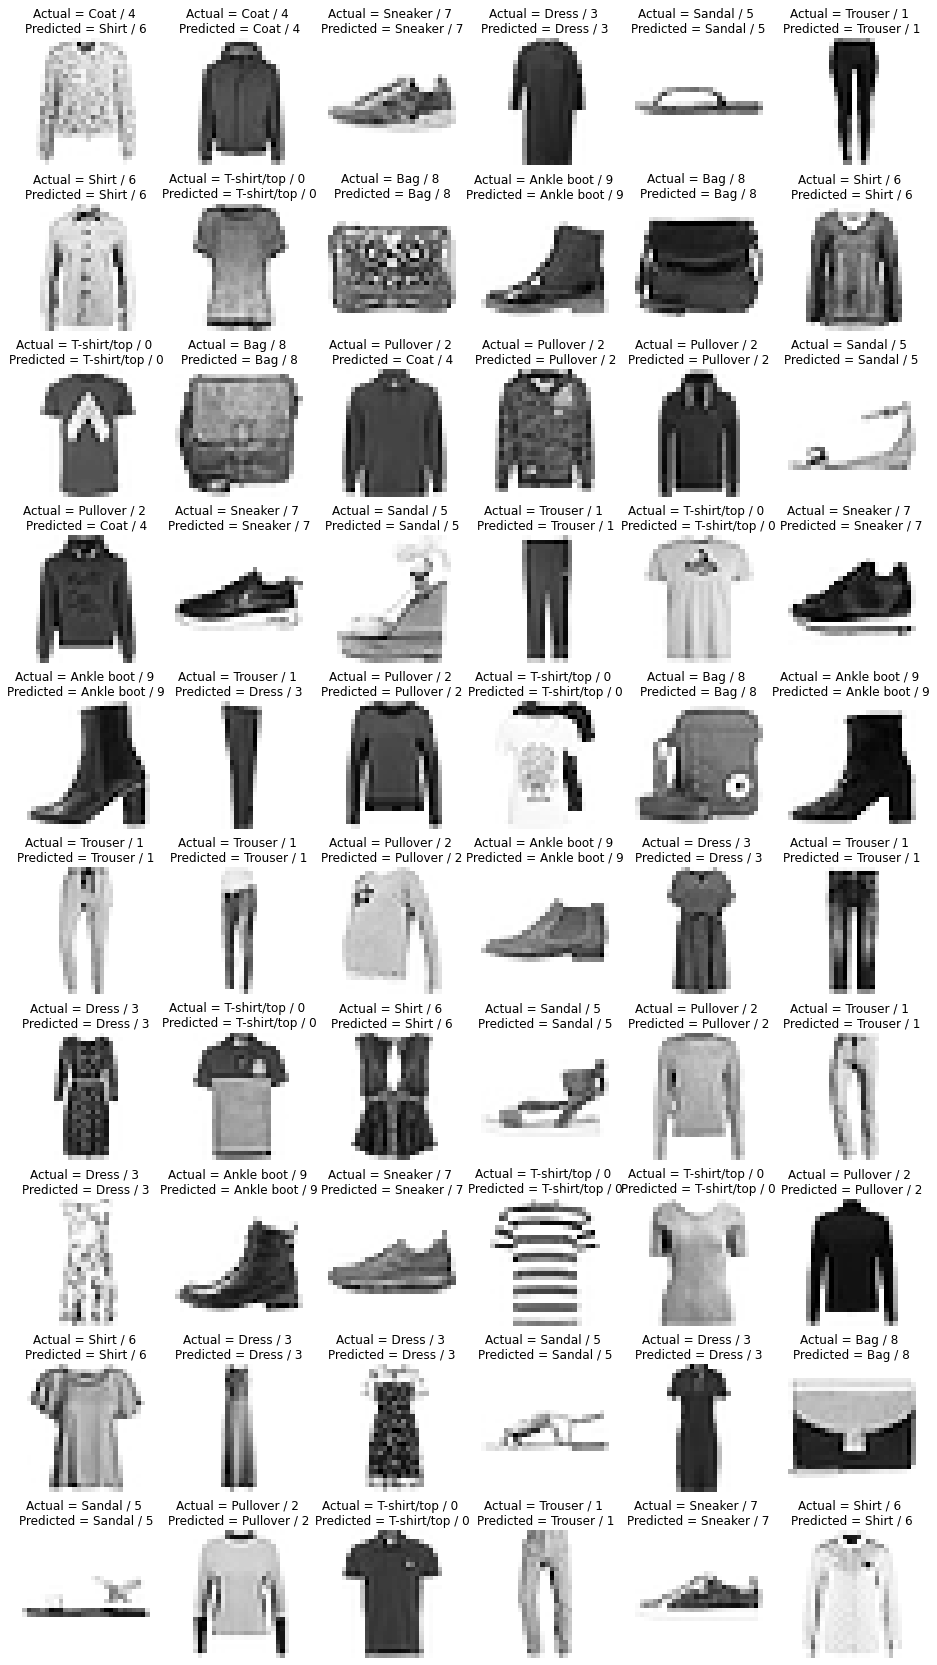

In [ ]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
" ## Confusion Matrix"

' ## Confusion Matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.86      0.82      0.84      1000
       Dress       0.88      0.91      0.90      1000
        Coat       0.91      0.71      0.80      1000
      Sandal       0.97      0.98      0.97      1000
       Shirt       0.62      0.79      0.70      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



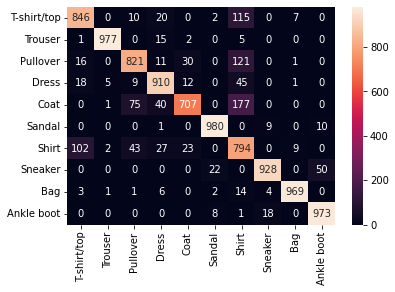

In [ ]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels = class_labels, yticklabels = class_labels)

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_labels, target_names = class_labels)
print(cr)

In [ ]:
"# Save Model"

'# Save Model'

In [ ]:
model.save('fashion_mnist_cnn_model.h5')

Build 2 complex CNN

In [ ]:
#Building CNN model
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding="valid", activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# compile the model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
cnn_model2.fit(X_train,y_train,epochs=20,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/20
94/94 [==============================] - 18s 186ms/step - loss: 1.0057 - accuracy: 0.6250 - val_loss: 0.5521 - val_accuracy: 0.7851
Epoch 2/20
94/94 [==============================] - 17s 183ms/step - loss: 0.5400 - accuracy: 0.7961 - val_loss: 0.4597 - val_accuracy: 0.8291
Epoch 3/20
94/94 [==============================] - 21s 222ms/step - loss: 0.4591 - accuracy: 0.8300 - val_loss: 0.4001 - val_accuracy: 0.8509
Epoch 4/20
94/94 [==============================] - 20s 208ms/step - loss: 0.4050 - accuracy: 0.8513 - val_loss: 0.3627 - val_accuracy: 0.8636
Epoch 5/20
94/94 [==============================] - 17s 183ms/step - loss: 0.3662 - accuracy: 0.8654 - val_loss: 0.3418 - val_accuracy: 0.8720
Epoch 6/20
94/94 [==============================] - 17s 185ms/step - loss: 0.3419 - accuracy: 0.8750 - val_loss: 0.3264 - val_accuracy: 0.8773
Epoch 7/20
94/94 [==============================] - 17s 184ms/step - loss: 0.3215 - accuracy: 0.8803 - val_loss: 0.3179 - val_accuracy: 0.8841

In [ ]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

Building CNN Model


In [ ]:
cnn_model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding="valid", activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10, activation='softmax')
])

In [ ]:
# compile the model
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# train the model
cnn_model2.fit(X_train,y_train,epochs=50,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/50
94/94 [==============================] - 18s 191ms/step - loss: 0.1957 - accuracy: 0.9279 - val_loss: 0.2797 - val_accuracy: 0.9032
Epoch 2/50
94/94 [==============================] - 18s 192ms/step - loss: 0.1892 - accuracy: 0.9299 - val_loss: 0.2590 - val_accuracy: 0.9117
Epoch 3/50
94/94 [==============================] - 18s 194ms/step - loss: 0.1829 - accuracy: 0.9307 - val_loss: 0.2676 - val_accuracy: 0.9106
Epoch 4/50
94/94 [==============================] - 18s 187ms/step - loss: 0.1815 - accuracy: 0.9329 - val_loss: 0.2678 - val_accuracy: 0.9100
Epoch 5/50
94/94 [==============================] - 18s 192ms/step - loss: 0.1711 - accuracy: 0.9365 - val_loss: 0.2690 - val_accuracy: 0.9082
Epoch 6/50
94/94 [==============================] - 19s 203ms/step - loss: 0.1685 - accuracy: 0.9382 - val_loss: 0.2700 - val_accuracy: 0.9087
Epoch 7/50
94/94 [==============================] - 18s 187ms/step - loss: 0.1666 - accuracy: 0.9385 - val_loss: 0.2748 - val_accuracy: 0.9110

In [ ]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

In [ ]:
cnn_model3.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 2.3018 - accuracy: 0.9708


[2.301848888397217, 0.97079998254776]